## Guideline
- See Guideline.pdf posted under Canvas Assignments/Lab #1 

## Lab 1 Due 
- (section AA) - July 7th, 2020, 2:20pm, 
- (section AB) - July 9th, 2020, 12:00pm

## Environment
- Anaconda3 + Python3.7
- Additionally, you will need to install a package `simpleaudio`

## For Windows users
- Before installing `simpleaudio`, you need to download and install `Visual C++ Build Tool`
https://visualstudio.microsoft.com/visual-cpp-build-tools/

## Lab 1 Tasks
- Generating musical notes
- Improving the quality of the generated sound
- Overlapping notes


## Task 1  Generating musical note

### Import necessary packages

In [1]:
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np

### Creat single note

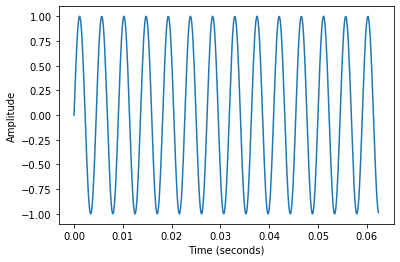

In [2]:
t = np.linspace(0,1,8000)
f = 220
note = np.sin(2*np.pi*f*t)
plt.plot(t[:500],note[:500]) #plots first 500 samples
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
sa.play_buffer((32767*note).astype('int16'), 1, 2, 8000).wait_done()

### Create multiple notes

In [3]:
notes = []
freq = 220.0
for i in range(0,10,1):
    t = np.linspace(0, 1, 1*8000)
    current_freq = freq * 2 **(i/12)
    note = np.sin(2 * np.pi * current_freq * t)
    notes.append(note)
full_note = np.concatenate(notes)
                              
sa.play_buffer((32767*full_note).astype('int16'), 1, 2, 8000).wait_done()

## Task 2 ADSR

In [4]:
t = np.linspace(0,1,8000)
f = 220.0
note=np.sin(2*np.pi*f*t)

a = np.linspace(0.0, 0.9, int(0.2*8000))
d = np.linspace(0.9, 0.7, int(0.2*8000))
s = np.linspace(0.7, 0.7, int(0.5*8000))
r = np.linspace(0.7, 0.0, int(0.1*8000))
env = np.concatenate([a,d,s,r])
sa.play_buffer((32767*note*env).astype('int16'), 1, 2, 8000).wait_done()

## Task 3 Overlapping notes
### Create two waves

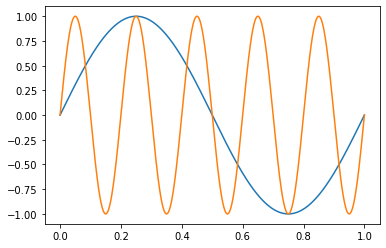

In [5]:
t = np.linspace(0,1,8000)
f = 1.0
note1=np.sin(2*np.pi*f*t)
plt.plot(t,note1)
f2 = 5.0
note2=np.sin(2*np.pi*f2*t)
plt.plot(t,note2)

### Add them together with zero-padding

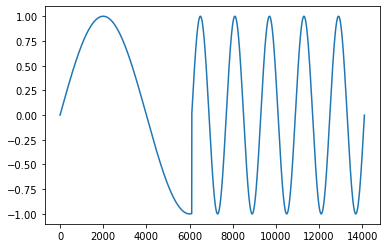

In [6]:
new_note = np.zeros(len(note1)+len(note2)-1900)
new_note[0:len(note1)] = note1
new_note[len(note1)-1900::] = note2
new_t = np.linspace(0,len(new_note),len(new_note))
plt.plot(new_t,new_note)

### Two notes without overlapping

In [7]:
note1 = notes[0]
note2 = notes[1]
sa.play_buffer((32767*note1).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((32767*note2).astype('int16'), 1, 2, 8000).wait_done()

### Two notes with overlapping

In [8]:
new_note = np.zeros(len(note1)+len(note2)-4000)
new_note[0:len(note1)] = note1
new_note[len(note1)-4000::] = note2
sa.play_buffer((32767*new_note).astype('int16'), 1, 2, 8000).wait_done()